In [2]:
import os
import matplotlib.pyplot as plt
import re
import numpy as np
from scipy import stats
#import optshrink as opt # package we create
import numpy as np
# import scipy.io as sio
import h5py
import matplotlib.pyplot as plt 
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import seaborn as sns
from shapely.geometry import Point
import geopandas as gp
from geodatasets import get_path
from shapely.geometry import Polygon

In [15]:
output_col_names = ['lon'
,'lat'
,'variable'
,'cohort_number'
,'stand_age'
,'potential_veg'
,'current_veg'
,'community_type'
,'subtype'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']




In [16]:
output_dir_path = '/group/moniergrp/TEM_Large_Ensemble/output_files/' 

regions = [
'region_1',
'region_2',
# 'region_3',
'region_4',
'region_5',
'region_8',
'region_20',
'region_6',
'region_7',
'region_19',
'region_21'
          ]

In [17]:
all_areas = pd.DataFrame()

for region in regions:
    tt = pd.read_csv(output_dir_path+region+'/lat_lon_equil.csv')
    all_areas = pd.concat([all_areas, tt])

In [18]:

map_data = gp.GeoDataFrame(
    all_areas, geometry=gp.points_from_xy(all_areas.lon, all_areas.lat)
    , crs="EPSG:4326"
)


In [19]:
map_data

,lon,lat,variable,forest_type,current_veg,silt_clay,region,land_area,cohort_area,monthly_mean_weight,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,run_region,geometry
0,-177.0,-44.0,AVAILN,Temperate Broadleaved Evergreen Forests,33,71.21,New_Zealand,2434887,2434887,3.826774e+08,...,154.57,155.02,155.24,155.27,154.67,155.76,159.67,158.81,region_1,POINT (-177.00000 -44.00000)
1,-177.0,-44.0,GPP,Temperate Broadleaved Evergreen Forests,33,71.21,New_Zealand,2434887,2434887,4.741628e+08,...,119.45,88.56,94.00,121.72,158.48,211.36,261.81,307.39,region_1,POINT (-177.00000 -44.00000)
2,-177.0,-44.0,LAI,Temperate Broadleaved Evergreen Forests,33,71.21,New_Zealand,2434887,2434887,5.355245e+06,...,2.17,2.15,2.12,2.08,2.07,2.23,2.32,2.35,region_1,POINT (-177.00000 -44.00000)
3,-177.0,-44.0,NCE,Temperate Broadleaved Evergreen Forests,33,71.21,New_Zealand,2434887,2434887,3.170338e+06,...,-62.00,-73.30,-59.55,-29.58,7.29,49.00,37.19,67.43,region_1,POINT (-177.00000 -44.00000)
4,-177.0,-44.0,NEP,Temperate Broadleaved Evergreen Forests,33,71.21,New_Zealand,2434887,2434887,3.170338e+06,...,-62.00,-73.30,-59.55,-29.58,7.29,49.00,37.19,67.43,region_1,POINT (-177.00000 -44.00000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11193,-35.0,-7.5,NPP,Tropical Evergreen Forests,16,38.64,Brazil,2928744,2915899,2.011521e+08,...,99.42,90.52,83.80,73.54,60.53,49.23,32.62,30.91,region_21,POINT (-35.00000 -7.50000)
11194,-35.0,-7.5,SOILORGC,Tropical Evergreen Forests,16,38.64,Brazil,2928744,2915899,1.732899e+10,...,5934.45,5934.37,5939.42,5945.67,5948.49,5950.85,5948.38,5947.84,region_21,POINT (-35.00000 -7.50000)
11195,-35.0,-7.5,VEGC,Tropical Evergreen Forests,16,38.64,Brazil,2928744,2915899,5.173676e+10,...,17759.55,17781.91,17795.64,17798.88,17791.27,17770.00,17734.31,17694.59,region_21,POINT (-35.00000 -7.50000)
11196,-35.0,-7.5,VEGINNPP,Tropical Evergreen Forests,16,38.64,Brazil,2928744,2915899,2.094589e+08,...,102.26,93.60,87.12,76.41,62.74,51.78,35.38,33.80,region_21,POINT (-35.00000 -7.50000)


In [18]:
map_data.loc[map_data['variable'] ==' AVAILN ', 'monthly_mean'].describe()

count    9.764000e+03
mean    -3.979383e+18
std      2.544641e+20
min     -1.773701e+22
25%     -1.006622e+04
50%      4.702650e+02
75%      8.496525e+02
max      8.036764e+14
Name: monthly_mean, dtype: float64

In [20]:
avail_n = map_data.loc[map_data['variable'] ==' AVAILN '].groupby(['lon', 'lat', 'forest_type','run_region'])['monthly_mean'].mean().reset_index()
vegc = map_data.loc[map_data['variable'] ==' VEGC '].groupby(['lon', 'lat', 'forest_type','run_region'])['monthly_mean'].mean().reset_index() 

compare = avail_n.merge(vegc, on = ['lon','lat','forest_type','run_region'], suffixes  =('_availn','_vegc'))


In [13]:
compare.groupby('forest_type')['monthly_mean_availn'].mean()

forest_type
Boreal Forest                             -2.426565e+03
Boreal Woodlands                          -3.962139e+04
Forested Boreal Wetlands                   4.734898e+02
Mixed Temperate Forests                   -4.241888e+05
Temperate Broadleaved Evergreen Forests   -5.223608e+07
Temperate Coniferous Forests              -2.535387e+04
Temperate Deciduous Forests               -3.845744e+04
Temperate Forested Floodplains            -1.332200e+10
Temperate Forested Wetlands               -1.259798e+05
Tropical Deciduous Forests                -5.095391e+16
Tropical Evergreen Forests                -1.710096e+19
Tropical Forested Floodplains             -1.298424e+06
Tropical Forested Wetlands                -2.284091e+07
Xeromorphic Forests and Woodlands         -4.612214e+11
Name: monthly_mean_availn, dtype: float64

In [21]:
compare.groupby('run_region')['monthly_mean_availn'].mean()

run_region
region_1    -1.629293e+05
region_19   -4.500514e+08
region_2    -1.411654e+10
region_20   -4.491899e+02
region_21   -3.816768e+19
region_4    -4.150258e+09
region_5    -7.607815e+03
region_6    -3.357175e+11
region_7    -2.323892e+10
region_8    -4.272335e+09
Name: monthly_mean_availn, dtype: float64

In [21]:
compare.loc[compare['monthly_mean_availn']<-1000, 'forest_type'].value_counts()

Boreal Woodlands                           1152
Tropical Evergreen Forests                  724
Xeromorphic Forests and Woodlands           641
Tropical Deciduous Forests                  230
Mixed Temperate Forests                     152
Temperate Broadleaved Evergreen Forests      54
Temperate Deciduous Forests                  31
Temperate Coniferous Forests                 20
Tropical Forested Floodplains                17
Boreal Forest                                16
Tropical Forested Wetlands                   13
Temperate Forested Floodplains               10
Temperate Forested Wetlands                   2
Name: forest_type, dtype: int64

In [20]:
compare.loc[compare['monthly_mean_availn']>=0, 'forest_type'].value_counts()

Boreal Forest                              2065
Tropical Evergreen Forests                 1521
Temperate Coniferous Forests                674
Mixed Temperate Forests                     637
Tropical Deciduous Forests                  463
Boreal Woodlands                            398
Temperate Deciduous Forests                 386
Temperate Broadleaved Evergreen Forests     153
Forested Boreal Wetlands                    150
Xeromorphic Forests and Woodlands           131
Tropical Forested Floodplains                32
Tropical Forested Wetlands                   21
Temperate Forested Wetlands                  14
Name: forest_type, dtype: int64

In [22]:
compare.loc[compare['monthly_mean_availn']<-10000]

,lon,lat,forest_type,monthly_mean_availn,monthly_mean_vegc
614,-134.5,67.5,Boreal Woodlands,-1.120292e+04,2459.65
615,-134.5,68.0,Boreal Woodlands,-1.309323e+04,2587.10
633,-134.0,66.5,Boreal Woodlands,-1.137721e+04,2991.81
646,-133.5,58.5,Temperate Coniferous Forests,-2.033531e+04,2418.30
658,-133.5,66.5,Boreal Woodlands,-1.470161e+04,3192.41
...,...,...,...,...,...
9753,-35.5,-9.0,Tropical Evergreen Forests,-9.257213e+05,12999.11
9756,-35.5,-7.5,Xeromorphic Forests and Woodlands,-2.363430e+11,19.83
9758,-35.5,-6.5,Xeromorphic Forests and Woodlands,-6.776044e+11,28.36
9759,-35.5,-6.0,Xeromorphic Forests and Woodlands,-5.027945e+11,31.80


count     6526.000000
mean     12451.190763
std       6753.305532
min        198.650000
25%       6702.350000
50%      11751.255000
75%      18288.887500
max      29493.830000
Name: monthly_mean_vegc, dtype: float64


(array([ 554.,  934.,  778., 1044.,  682.,  749.,  847.,  671.,  257.,
          10.]),
 array([  198.65 ,  3128.168,  6057.686,  8987.204, 11916.722, 14846.24 ,
        17775.758, 20705.276, 23634.794, 26564.312, 29493.83 ]),
 <BarContainer object of 10 artists>)

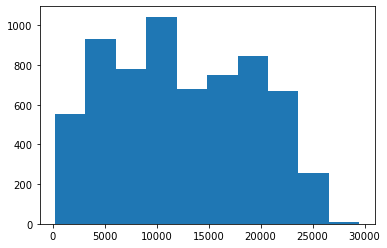

In [17]:
print(compare.loc[compare['monthly_mean_availn']>0, 'monthly_mean_vegc'].describe())
plt.hist(compare.loc[compare['monthly_mean_availn']>0, 'monthly_mean_vegc'])

count     3238.000000
mean      6424.719765
std       6332.716286
min          0.000000
25%       1538.357500
50%       3771.315000
75%      11161.575000
max      26001.630000
Name: monthly_mean_vegc, dtype: float64


(array([1.169e+03, 7.760e+02, 2.270e+02, 1.840e+02, 2.180e+02, 2.230e+02,
        2.310e+02, 1.690e+02, 4.000e+01, 1.000e+00]),
 array([    0.   ,  2600.163,  5200.326,  7800.489, 10400.652, 13000.815,
        15600.978, 18201.141, 20801.304, 23401.467, 26001.63 ]),
 <BarContainer object of 10 artists>)

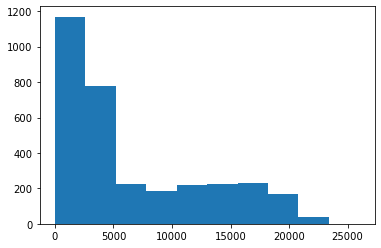

In [18]:
print(compare.loc[compare['monthly_mean_availn']<=0, 'monthly_mean_vegc'].describe())
plt.hist(compare.loc[compare['monthly_mean_availn']<=0, 'monthly_mean_vegc'])

In [ ]:
map_data.loc[(map_data['variable'] == ' VEGC ')
             &(map_data['variable'] == ' AVAILN ')
             , 'monthly_mean']

In [7]:
reg_8 = pd.read_csv(output_dir_path+'region_19/lat_lon_year_var_equil.csv')

In [34]:
reg_8.loc[(reg_8['variable'] ==' SOILORGC ')].groupby('model')['monthly_mean'].mean()

model
AWIxxCMxx1xx1xxMR    9.666208e+03
BCCxxCSM2xxMR        6.571539e+03
CanESM5              6.170431e+03
MIROC6               3.631192e+06
MPIxxESM1xx2xxHR     9.950213e+03
MPIxxESM1xx2xxLR     8.989786e+03
MRIxxESM2xx0         8.060403e+03
Name: monthly_mean, dtype: float64

In [11]:
reg_8.loc[(reg_8['variable'] ==' AVAILN ')].groupby('model')['monthly_mean'].mean()

model
AWIxxCMxx1xx1xxMR   -5.132559e+05
BCCxxCSM2xxMR       -6.635102e+08
CanESM5             -2.291380e+09
MIROC6              -9.362214e+07
MPIxxESM1xx2xxHR    -1.490479e+08
MPIxxESM1xx2xxLR    -2.750566e+06
MRIxxESM2xx0        -2.041885e+06
Name: monthly_mean, dtype: float64

In [12]:
reg_8.loc[(reg_8['variable'] ==' AVAILN ') &(reg_8['model']=='CanESM5') & (reg_8['monthly_mean']< -100000)]

,lon,lat,variable,forest_type,current_veg,year,silt_clay,region,land_area,cohort_area,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,model,file
9518777,-66.5,-12.5,AVAILN,Tropical Evergreen Forests,16,1508,59.11,Bolivia,9060,2854,...,-1.737024e+05,-1.849581e+05,-1.964582e+05,-2.082062e+05,-2.202079e+05,-2.324702e+05,-2.449919e+05,-2.577782e+05,CanESM5,AVAILN.csv720
9518778,-66.5,-12.5,AVAILN,Tropical Evergreen Forests,16,1509,59.11,Bolivia,9060,2853,...,-3.258811e+05,-3.403773e+05,-3.551795e+05,-3.702945e+05,-3.857289e+05,-4.014891e+05,-4.175823e+05,-4.340152e+05,CanESM5,AVAILN.csv720
9518779,-66.5,-12.5,AVAILN,Tropical Evergreen Forests,16,1510,59.11,Bolivia,9060,2852,...,-5.215332e+05,-5.401600e+05,-5.591797e+05,-5.786004e+05,-5.984308e+05,-5.984769e+05,-6.191521e+05,-6.402631e+05,CanESM5,AVAILN.csv720
9518780,-66.5,-12.5,AVAILN,Tropical Evergreen Forests,16,1511,59.11,Bolivia,9060,2852,...,-7.526641e+05,-7.766710e+05,-8.011120e+05,-8.260663e+05,-8.515471e+05,-8.775641e+05,-9.041305e+05,-9.312571e+05,CanESM5,AVAILN.csv720
9518781,-66.5,-12.5,AVAILN,Tropical Evergreen Forests,16,1512,59.11,Bolivia,9060,2851,...,-1.075733e+06,-1.106485e+06,-1.137887e+06,-1.169952e+06,-1.202694e+06,-1.236128e+06,-1.270267e+06,-1.305127e+06,CanESM5,AVAILN.csv720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13530694,-69.0,-11.5,AVAILN,Tropical Evergreen Forests,16,1846,54.78,Bolivia,263697,2964,...,-2.413539e+08,-2.413539e+08,-2.413538e+08,-2.413538e+08,-2.413538e+08,-2.413537e+08,-2.413537e+08,-2.413536e+08,CanESM5,AVAILN.csv480
13530695,-69.0,-11.5,AVAILN,Tropical Evergreen Forests,16,1847,54.78,Bolivia,272790,2964,...,-2.413538e+08,-2.413537e+08,-2.413537e+08,-2.413536e+08,-2.413536e+08,-2.413535e+08,-2.413535e+08,-2.413534e+08,CanESM5,AVAILN.csv480
13530696,-69.0,-11.5,AVAILN,Tropical Evergreen Forests,16,1848,54.78,Bolivia,281883,2965,...,-2.412721e+08,-2.412721e+08,-2.412720e+08,-2.412720e+08,-2.412720e+08,-2.412719e+08,-2.412719e+08,-2.412718e+08,CanESM5,AVAILN.csv480
13530697,-69.0,-11.5,AVAILN,Tropical Evergreen Forests,16,1849,54.78,Bolivia,281883,2964,...,-2.413534e+08,-2.413534e+08,-2.413533e+08,-2.413533e+08,-2.413533e+08,-2.413532e+08,-2.413532e+08,-2.413531e+08,CanESM5,AVAILN.csv480


<Axes: xlabel='year', ylabel='monthly_mean'>

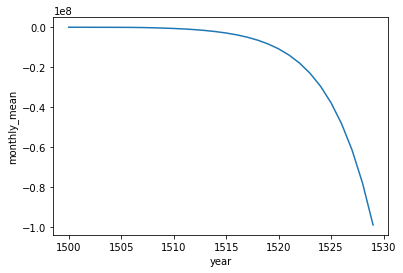

In [17]:
sns.lineplot(data = reg_8.loc[(reg_8['variable'] ==' AVAILN ') &(reg_8['model']=='CanESM5')
                             &(reg_8['lon']==-66.5)&(reg_8['lat']==-12.5)&(reg_8['year']< 1530)]
             ,x='year',y='monthly_mean')

<Axes: xlabel='year', ylabel='monthly_mean'>

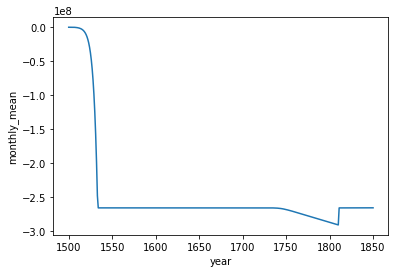

In [13]:
sns.lineplot(data = reg_8.loc[(reg_8['variable'] ==' AVAILN ') &(reg_8['model']=='CanESM5')
                             &(reg_8['lon']==-66.5)&(reg_8['lat']==-12.5)]
             ,x='year',y='monthly_mean')

In [12]:
cru_availn = pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/cru_test_availn/var_out/AVAILN.csv0'
                        ,names = output_col_names)
availn = pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/availn/var_out/AVAILN.csv0'
                                             ,names = output_col_names)

cru_vegc = pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/cru_test_availn/var_out/VEGC.csv0'
                        ,names = output_col_names)
vegc = pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/availn/var_out/VEGC.csv0'
                                             ,names = output_col_names)


In [8]:
availn

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,community_type,subtype,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
0,-66.5,-12.5,AVAILN,1,3000,16,16,16,10,59.11,...,70420.36,68991.93,67985.62,67405.95,67391.32,66947.15,66553.89,65717.54,64868.89,Bolivia
1,-66.5,-12.5,AVAILN,2,425,16,16,16,10,59.11,...,70420.36,68991.93,67985.62,67405.95,67391.32,66947.15,66553.89,65717.54,64868.89,Bolivia
2,-66.5,-12.5,AVAILN,3,0,51,51,51,18,59.11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Bolivia
3,-66.5,-12.5,AVAILN,1,3000,16,16,16,10,59.11,...,62513.57,61315.03,59866.87,59092.78,58734.85,58765.07,58180.50,57700.80,56820.83,Bolivia
4,-66.5,-12.5,AVAILN,2,426,16,16,16,10,59.11,...,62513.57,61315.03,59866.87,59092.78,58734.85,58765.07,58180.50,57700.80,56820.83,Bolivia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42010,-66.5,-12.5,AVAILN,206,13,16,51,51,18,59.11,...,4651.23,4670.35,4686.16,4701.32,4717.34,4731.23,4742.87,4753.16,4767.18,Bolivia
42011,-66.5,-12.5,AVAILN,207,10,16,51,51,18,59.11,...,3315.77,3335.81,3352.29,3368.11,3384.79,3399.18,3411.05,3421.23,3434.98,Bolivia
42012,-66.5,-12.5,AVAILN,208,7,16,51,51,18,59.11,...,1634.29,1650.08,1662.97,1675.42,1688.67,1700.09,1709.51,1717.22,1727.89,Bolivia
42013,-66.5,-12.5,AVAILN,209,4,16,51,51,18,59.11,...,90.21,90.21,90.22,90.22,90.22,90.22,90.22,90.22,90.22,Bolivia


In [13]:
vegc.monthly_mean.describe()

count    42015.000000
mean         0.845830
std         11.922523
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        445.990000
Name: monthly_mean, dtype: float64

In [14]:
cru_vegc.monthly_mean.describe()

count    26990.000000
mean      7630.903213
std       9315.587948
min          0.000000
25%        641.630000
50%        737.800000
75%      18624.885000
max      25041.760000
Name: monthly_mean, dtype: float64

In [11]:
availn.monthly_mean.describe()

count    4.201500e+04
mean    -1.043268e+08
std      2.087577e+09
min     -6.736144e+10
25%      8.952700e+03
50%      2.816247e+04
75%      5.074268e+04
max      1.794285e+05
Name: monthly_mean, dtype: float64

In [10]:
cru_availn.monthly_mean.describe()

count     26990.000000
mean        740.002704
std        3445.689460
min         135.650000
25%         447.080000
50%         491.065000
75%         531.487500
max      141732.420000
Name: monthly_mean, dtype: float64

In [14]:
reg_8.columns

Index(['lon', 'lat', 'variable', 'forest_type', 'current_veg', 'year',
       'silt_clay', 'region', 'land_area', 'cohort_area',
       'monthly_mean_weight', 'Jan_weight', 'Feb_weight', 'Mar_weight',
       'Apr_weight', 'May_weight', 'Jun_weight', 'Jul_weight', 'Aug_weight',
       'Sep_weight', 'Oct_weight', 'Nov_weight', 'Dec_weight', 'monthly_mean',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'model', 'file'],
      dtype='object')

In [16]:
reg_8.loc[(reg_8['variable'] ==' AVAILN ') &(reg_8['model']=='CanESM5')
                             &(reg_8['lon']==-66.5)&(reg_8['lat']==-12.5), ['year' ,'monthly_mean',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec']]

,year,monthly_mean,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
9518769,1500,7.006384e+04,8.023426e+04,7.931934e+04,7.488482e+04,7.042628e+04,6.899767e+04,6.799114e+04,6.741121e+04,6.739631e+04,6.695188e+04,6.655841e+04,6.572183e+04,6.487295e+04
9518770,1501,6.029880e+04,6.414711e+04,6.349665e+04,6.293189e+04,6.251668e+04,6.131788e+04,5.986947e+04,5.909515e+04,5.873699e+04,5.876701e+04,5.818223e+04,5.770233e+04,5.682215e+04
9518771,1502,5.237385e+04,5.603823e+04,5.528415e+04,5.479966e+04,5.386621e+04,5.302057e+04,5.198465e+04,5.129885e+04,5.125094e+04,5.105041e+04,5.104459e+04,5.069349e+04,4.815447e+04
9518772,1503,4.112972e+04,4.561004e+04,4.428869e+04,4.334180e+04,4.251175e+04,4.158814e+04,4.059327e+04,4.001566e+04,3.994300e+04,3.962389e+04,3.933749e+04,3.881069e+04,3.789221e+04
9518773,1504,3.087761e+04,3.674121e+04,3.563421e+04,3.469933e+04,3.342665e+04,3.206671e+04,3.040178e+04,2.965612e+04,2.922989e+04,2.859015e+04,2.767062e+04,2.680714e+04,2.560754e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9519115,1846,-2.659790e+08,-2.659791e+08,-2.659791e+08,-2.659791e+08,-2.659791e+08,-2.659791e+08,-2.659790e+08,-2.659790e+08,-2.659790e+08,-2.659790e+08,-2.659790e+08,-2.659790e+08,-2.659790e+08
9519116,1847,-2.659789e+08,-2.659789e+08,-2.659789e+08,-2.659789e+08,-2.659789e+08,-2.659789e+08,-2.659789e+08,-2.659789e+08,-2.659788e+08,-2.659788e+08,-2.659788e+08,-2.659788e+08,-2.659788e+08
9519117,1848,-2.659787e+08,-2.659788e+08,-2.659788e+08,-2.659787e+08,-2.659787e+08,-2.659787e+08,-2.659787e+08,-2.659787e+08,-2.659787e+08,-2.659787e+08,-2.659786e+08,-2.659786e+08,-2.659786e+08
9519118,1849,-2.659784e+08,-2.659785e+08,-2.659785e+08,-2.659784e+08,-2.659784e+08,-2.659784e+08,-2.659784e+08,-2.659784e+08,-2.659784e+08,-2.659784e+08,-2.659783e+08,-2.659783e+08,-2.659783e+08


In [35]:
reg_8.loc[(reg_8['variable'] ==' LAI ')].groupby('model')['monthly_mean'].mean()

model
AWIxxCMxx1xx1xxMR    2.083097
BCCxxCSM2xxMR        1.964330
CanESM5              1.728945
MIROC6               2.683766
MPIxxESM1xx2xxHR     2.124745
MPIxxESM1xx2xxLR     2.037710
MRIxxESM2xx0         2.252453
Name: monthly_mean, dtype: float64

In [36]:
reg_8.loc[(reg_8['variable'] ==' NCE ')].groupby('model')['monthly_mean'].mean()

model
AWIxxCMxx1xx1xxMR     0.388043
BCCxxCSM2xxMR         0.220477
CanESM5               0.059389
MIROC6               95.522067
MPIxxESM1xx2xxHR      0.595843
MPIxxESM1xx2xxLR      0.972011
MRIxxESM2xx0          0.322591
Name: monthly_mean, dtype: float64

In [37]:
reg_8.loc[(reg_8['variable'] ==' NEP ')].groupby('model')['monthly_mean'].mean()

model
AWIxxCMxx1xx1xxMR     0.620218
BCCxxCSM2xxMR         0.480486
CanESM5               0.249763
MIROC6               95.754301
MPIxxESM1xx2xxHR      0.850529
MPIxxESM1xx2xxLR      1.194670
MRIxxESM2xx0          0.580298
Name: monthly_mean, dtype: float64

In [32]:
map_data.loc[(map_data['variable'] ==' SOILORGC ')
             &(map_data['monthly_mean'] > 100000)
          , 'run_region'  ].value_counts()

region_19    925
region_21    535
region_7     260
region_8      27
region_20      3
region_6       3
Name: run_region, dtype: int64

In [38]:
map_data.loc[(map_data['variable'] ==' LAI ')
             &(map_data['monthly_mean'] > 10)
          , 'run_region'  ].value_counts()

Series([], Name: run_region, dtype: int64)

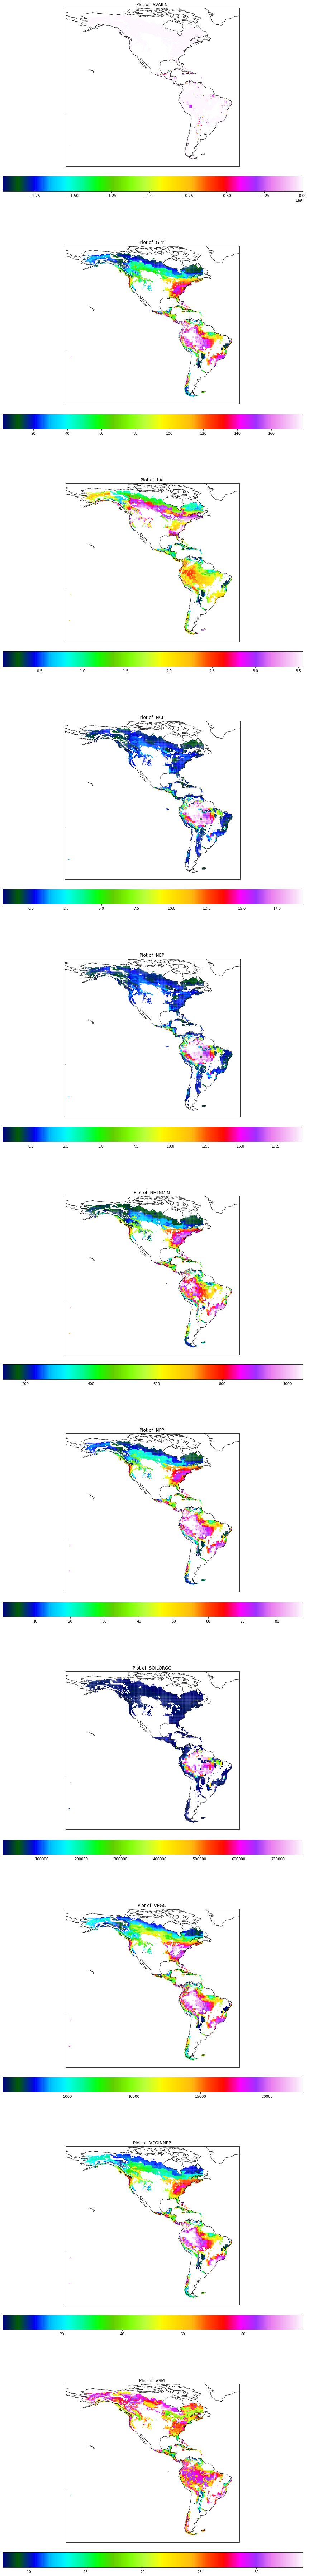

In [17]:
variable_columns = map_data['variable'].unique()

# Number of plots, one for each variable
number_of_plots = len(variable_columns)

fig, axs = plt.subplots(nrows=number_of_plots, ncols=1, figsize=(15, 12 * number_of_plots),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# If there is only one variable, axs will not be an array, so we make it into a list for consistency.
if number_of_plots == 1:
    axs = [axs]

for i, var in enumerate(variable_columns):
    ax = axs[i]  # Select the ax for the current plot
    ax.coastlines(color="0.1")
    min_val = map_data.loc[
    (map_data['variable'] == var)
   , 'monthly_mean' ].quantile(.05)
    max_val = map_data.loc[
    (map_data['variable'] == var)
   , 'monthly_mean' ].quantile(.95)
    
    
    plot = map_data.loc[
    (map_data['variable'] == var)
    &(map_data['monthly_mean'].between(min_val, max_val))
    ].plot(ax=ax, cmap='gist_ncar', column='monthly_mean', legend=True,
                          markersize=1,
                         legend_kwds={"location": "bottom", "pad": 0.05})
    ax.set_title(f'Plot of {var}')  # Set the title for each subplot

plt.show()  # Display the plots

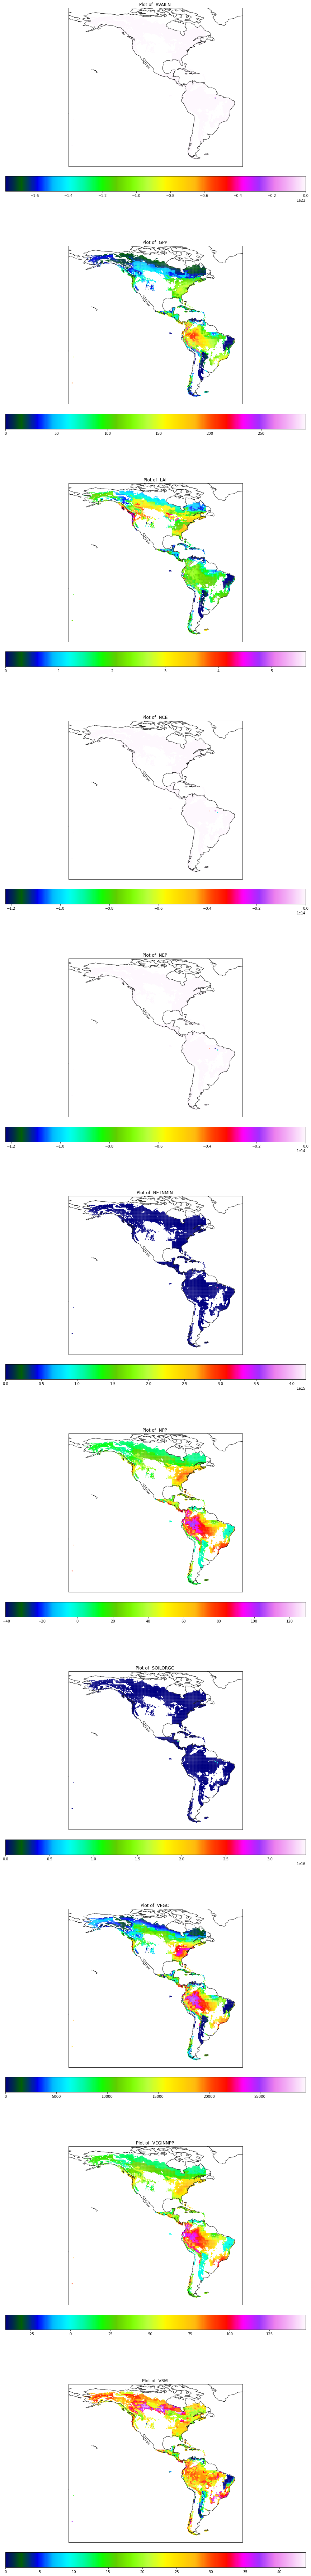

In [ ]:
variable_columns = map_data['variable'].unique()

# Number of plots, one for each variable
number_of_plots = len(variable_columns)

fig, axs = plt.subplots(nrows=number_of_plots, ncols=1, figsize=(15, 12 * number_of_plots),
                        subplot_kw={'projection': ccrs.PlateCarree()})

# If there is only one variable, axs will not be an array, so we make it into a list for consistency.
if number_of_plots == 1:
    axs = [axs]

for i, var in enumerate(variable_columns):
    ax = axs[i]  # Select the ax for the current plot
    ax.coastlines(color="0.1")

    plot = map_data.loc[
    map_data['variable'] == var
    ].plot(ax=ax, cmap='gist_ncar', column='monthly_mean', legend=True,
                          markersize=1,
                         legend_kwds={"location": "bottom", "pad": 0.05})
    ax.set_title(f'Plot of {var}')  # Set the title for each subplot

plt.show()  # Display the plots